# The notebook is made to parse ad analyse data from AiThinker results for distance measurements from 2 UWB modules

Attention: The filenames should be in the fillowing format: 
1. "min" or "" - to determine the angle direction relative to perpendicular from the baseline of tags
2. anlge - angle between the position of anchor and normal to baseline of tags
3. "deg" if angle units is degrees
4. distance between tags
5. Optional - u can write everything you wand at the end of filename

The file naming example "min_30_deg_10.9090_mybeloved1231.txt".

In [6]:
import numpy as np

from parse_AiThinker_data import read_file_data, get_array_from_df, calc_results

In [7]:
import os

# Get the list of all files and directories
path = "2_tags_1_anchor_measurements"
dir_list = os.listdir(path)
dictionary = {}
for file_name in dir_list:
    file_name = path + '/' + file_name
    df_of_results = read_file_data(file_name, min_num_of_measurements=40)
    # print(df_of_results)
    results = get_array_from_df(df_of_results)
    dictionary = calc_results(file_name, results, dictionary=dictionary)

Exp info:
	Andle	Distance btw tags (cm)
	45 deg 	60 
	Results for 0.8485281374238569 m:
diff shspe: (66,)
	Tag 1
		True dist:			1.0816653826391966 m
		Estimated dist:	1.1862121212121213 m 
		Standard deviation:	16.90236235193817 cm
		RMSE of measurement:	0.19874356808172963 m
diff shspe: (66,)
	Tag 2
		True dist:			0.6708203932499367 m
		Estimated dist:	0.9465151515151515 m 
		Standard deviation:	14.531566918204494 cm
		RMSE of measurement:	0.31164762704814675 m
	Results for 1.2727922061357853 m:
diff shspe: (47,)
	Tag 1
		True dist:			1.4999999999999998 m
		Estimated dist:	2.1487234042553194 m 
		Standard deviation:	12.613091849811052 cm
		RMSE of measurement:	0.6608714427404074 m
diff shspe: (47,)
	Tag 2
		True dist:			1.0816653826391966 m
		Estimated dist:	1.7991489361702129 m 
		Standard deviation:	9.043229011040774 cm
		RMSE of measurement:	0.7231601818975567 m
	Results for 1.6970562748477138 m:
diff shspe: (45,)
	Tag 1
		True dist:			1.9209372712298542 m
		Estimated dist:	3.17399

In [8]:
max_err = max([tags_info["RMSE"] for dist, value in dictionary.items()
               for anchor_dist, value1 in value.items()
               for angle, value2 in value1.items()
               for tag, tags_info in value2.items()])



max_dist = max([tags_info["Truth_dist"] for dist, value in dictionary.items()
               for anchor_dist, value1 in value.items()
               for angle, value2 in value1.items()
               for tag, tags_info in value2.items()])


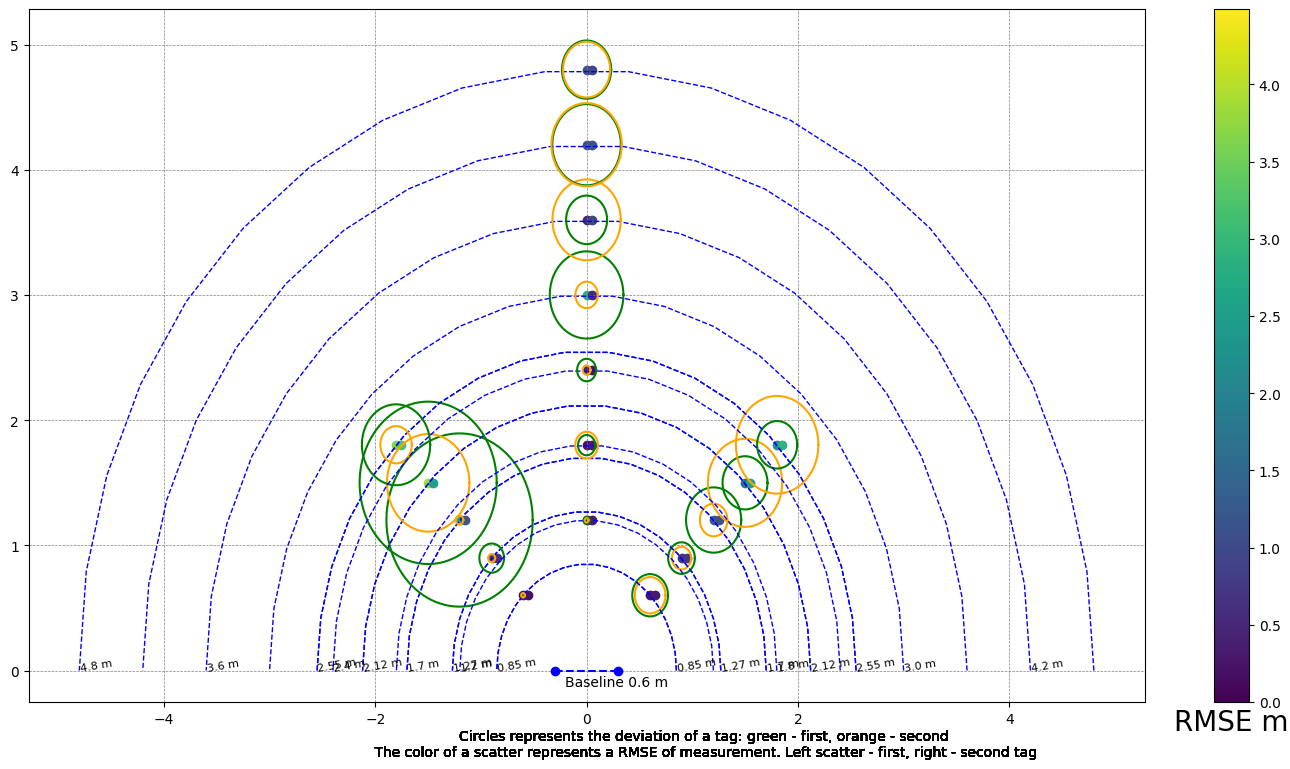

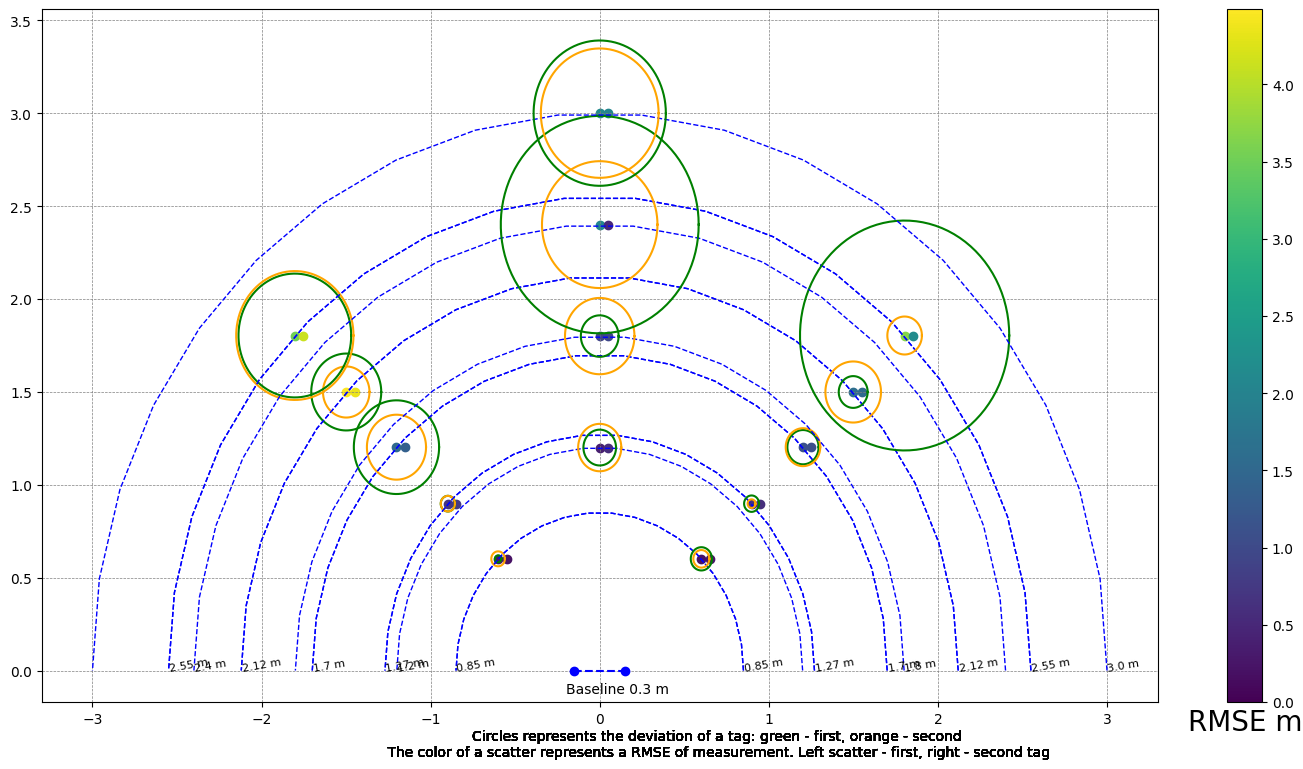

In [9]:
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as clrs

mid_baseline_xy = [0, 0]
for dist, value in dictionary.items():
    fig, ax = plt.subplots(figsize=(18, 9))
    plt.grid(color='gray', linestyle='--', linewidth=0.5)

    left_tag = [mid_baseline_xy[0] - dist / 2, mid_baseline_xy[1]]
    right_tag = [mid_baseline_xy[0] + dist / 2, mid_baseline_xy[1]]
    # plt.plot(mid_baseline_xy[0], mid_baseline_xy[1], marker="o", markersize=20, markeredgecolor="red",
    #          markerfacecolor="green")
    # plt.plot(left_tag[0], left_tag[1], marker="o", markersize=10, markeredgecolor="blue")
    # plt.plot(right_tag[0], right_tag[1], marker="o", markersize=10, markeredgecolor="blue")
    # draw baseline
    plt.plot([left_tag[0], right_tag[0]], [left_tag[1], right_tag[1]], 'bo', linestyle="--")
    plt.gca().annotate(f'Baseline {dist} m', xy=(0 - 0.2, 0 - 0.12), xycoords='data', fontsize=10)

    # plt.text(left_tag[0] - 0.5, left_tag[1] + 0.25, "left_tag")
    # plt.text(right_tag[0], right_tag[1] + 0.25, "right_tag")

    i = 0
    scatters = []
    colors = ["green", "orange"]

    for anchor_dist, value1 in value.items():
        r = round(float(anchor_dist.split(" ")[1]), 2)
        #draw arc
        arc_angles = np.linspace(0 * np.pi, np.pi, 20)
        arc_xs = r * np.cos(arc_angles)
        arc_ys = r * np.sin(arc_angles)
        plt.plot(arc_xs, arc_ys, linestyle="--", color='blue', lw=1)
        xy = (arc_xs[0], arc_ys[0])
        if i % 2 == 0:
            xy = (arc_xs[-1], arc_ys[0])
        plt.gca().annotate(f'{r} m', xy=xy, xycoords='data', fontsize=8, rotation=10)
        i += 1

        for angle, value2 in value1.items():
            anchor_pose_x = r * np.cos(angle)
            anchor_pose_y = r * np.sin(angle)
            for tag, tag_info in value2.items():
                tag_n = int(tag.split(' ')[1])
                dr = tag_info["STD"]
                rmse = tag_info["RMSE"]
                est = tag_info["Estimated_val"]
                angles = np.linspace(0 * np.pi, 2 * np.pi, 100)

                # tag_pos = (anchor_pose_x + anchor_pose_x*0.05*(-1)**(tag_n%2), anchor_pose_y)

                # Show std of a tag
                xs = anchor_pose_x + dr * np.cos(angles)
                ys = anchor_pose_y + dr * np.sin(angles)
                plt.plot(xs, ys, color=colors[tag_n])
                # plt.scatter(anchor_pose_x, anchor_pose_y, c=rmse, cmap='viridis')
                plt.scatter(anchor_pose_x+tag_n * 0.05, anchor_pose_y, c=rmse, cmap='viridis', vmin=0, vmax=max_err)

                # Show the results for each tag
                # est_x = est * np.cos(angle)
                # est_y = est * np.sin(angle)
                # plt.scatter(est_x, est_y, c=colors[tag_n])
                # plt.gca().annotate(f'tag_{tag_n+1}', xy=(est_x, est_y), xycoords='data', fontsize=8, rotation=10)

        txt = f"Circles represents the deviation of a tag: {colors[0]} - first, {colors[1]} - second\n The color of a scatter represents a RMSE of measurement. Left scatter - first, right - second tag"
        fig.text(.5, .05, txt, ha='center')
    cbar = plt.colorbar()
    cbar.ax.set_xlabel('RMSE m', fontsize=20)

    # plt.xlim(-max_dist, max_dist)
    # plt.ylim(-0.5, max_dist)
    plt.show()